# Introduction
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

### Definition scikit-learn
class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Mathematical Formulation

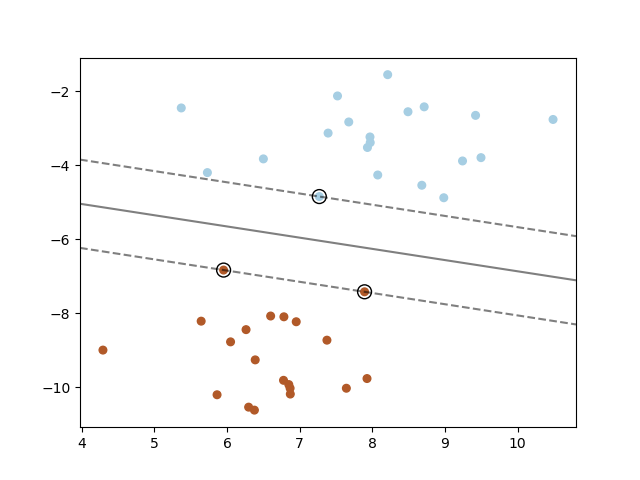

In [1]:
from IPython.display import Image
Image(filename="svm_plot_separating_hyperplane_0011.png")

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier


### Classification
Given vectors $x_i \in \mathbb{R}^p$ in tow classes and a vector $y \in \{1, -1\}^n$ SVC solves the problem:

\begin{align}\begin{aligned}\min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\\begin{split}\textrm {subject to } & y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,\\
& \zeta_i \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}

its dual is

\begin{align}\begin{aligned}\min_{\alpha} \frac{1}{2} \alpha^T Q \alpha - e^T \alpha\\\begin{split}
\textrm {subject to } & y^T \alpha = 0\\
& 0 \leq \alpha_i \leq C, i=1, ..., n\end{split}\end{aligned}\end{align}


where  is the vector of all ones, $C  \gt 0$ is the upper bound, Q is an n  by n positive semidefinite matrix, $Q_{ij} \equiv y_i y_j K(x_i, x_j)$, where $K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$ is the kernel. Here training vectors are implicitly mapped into a higher (maybe infinite) dimensional space by the function $\phi$.

The decision function is:

$\operatorname{sgn}(\sum_{i=1}^n y_i \alpha_i K(x_i, x) + \rho)$

### Regression

Given training vectors $x_i \in \mathbb{R}^p$, i=1,…, n, and a vector $y \in \mathbb{R}^n$ $\epsilon$-SVR solves the following primal problem:

\begin{align}\begin{aligned}\min_ {w, b, \zeta, \zeta^*} \frac{1}{2} w^T w + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*)\\\begin{split}\textrm {subject to } & y_i - w^T \phi (x_i) - b \leq \varepsilon + \zeta_i,\\
                      & w^T \phi (x_i) + b - y_i \leq \varepsilon + \zeta_i^*,\\
                      & \zeta_i, \zeta_i^* \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}

Its dual is

\begin{align}\begin{aligned}\min_{\alpha, \alpha^*} \frac{1}{2} (\alpha - \alpha^*)^T Q (\alpha - \alpha^*) + \varepsilon e^T (\alpha + \alpha^*) - y^T (\alpha - \alpha^*)\\\begin{split}
\textrm {subject to } & e^T (\alpha - \alpha^*) = 0\\
& 0 \leq \alpha_i, \alpha_i^* \leq C, i=1, ..., n\end{split}\end{aligned}\end{align}

where $e$ is the vector of all ones, $C > 0$ is the upper bound, Q is an  by  positive semidefinite matrix, $Q_{ij} \equiv K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$ is the kernel. Here training vectors are implicitly mapped into a higher (maybe infinite) dimensional space by the function $\phi$.

The decision function is:

$\sum_{i=1}^n (\alpha_i - \alpha_i^*) K(x_i, x) + \rho$

These parameters can be accessed through the members $dual_coef_$ which holds the difference , $support_vectors_$ which holds the support vectors, and $intercept_$ which holds the independent term $\rho$.




In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(100)


In [3]:
def choose_scaler(xtrain, xtest, name='Standard'):
    scaler = None
    if name == 'Standard':
        scaler = StandardScaler()
    elif name == 'MinMax':
        scaler = MinMaxScaler()
    else:
        scaler = QuantileTransformer()
    
    xtrain = scaler.fit_transform(xtrain)
    xtest = scaler.transform(xtest)
    return xtrain, xtest

In [4]:
data = load_breast_cancer()
print(data['feature_names'])
print('')
print('.' * 50)
x = data['data']
y = data['target']

xtrain, xtest, ytrain, ytest = train_test_split(x, y)
print('shape of xtrain:', xtrain.shape)    
xtrain, xtest = choose_scaler(xtrain, xtest, name='MiMax')
print('the scaled values are:')
print(xtrain)

clf = svm.SVC(gamma='scale')
clf.fit(xtrain, ytrain)

# step 3 make predictitions with test set
y_pred = clf.predict(xtest)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
    

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

..................................................
shape of xtrain: (426, 30)
the scaled values are:
[[0.39050016 0.65965966 0.4023181  ... 0.55455455 0.08808809 0.63310433]
 [0.55655656 0.48235294 0.5667345  ... 0.62345141 0.53194667 0.7246245 ]
 [0.10610611 0.28128128 0.10814807 ... 0.40019767 0.3988989  0.79525354]
 ...
 [0.24714325 0.32487684 0.22613926 ... 0.12243579 0.42347938 0.16008461]
 [0.42692693 0.40238535 0.43946208 ... 0.35185

# Cross validation

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

* A model is trained using  of the folds as training data;
* The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

In [5]:
# compute accuracy
clf.score(xtest, ytest)

0.965034965034965

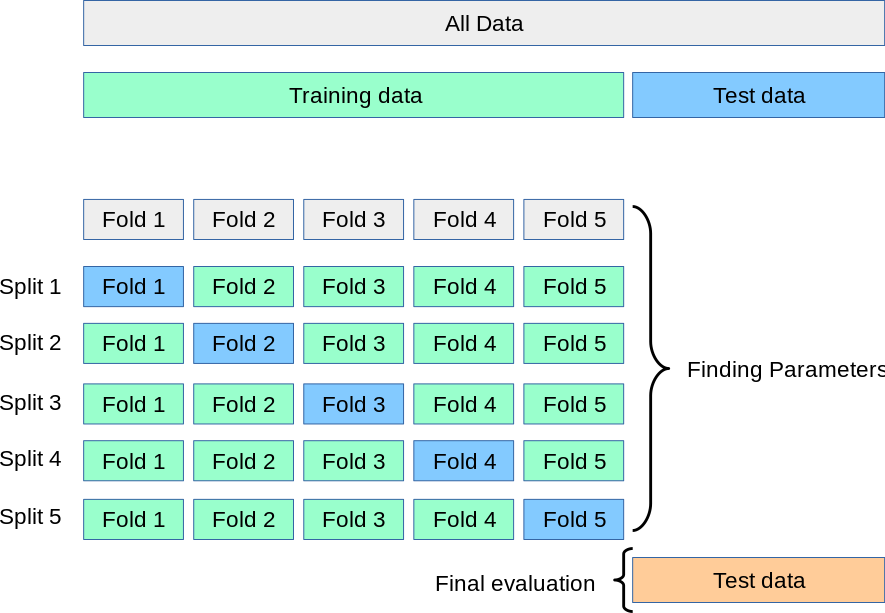

In [6]:
from IPython.display import Image
Image(filename="grid_search_cross_validation.png")

## Cross-validation with SVW

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
# note that all data can be used
clf = svm.SVC(gamma='scale')
scores = cross_val_score(clf, x, y, cv=10)
scores

array([0.93103448, 0.89655172, 0.9122807 , 0.96491228, 0.96491228,
       0.92982456, 0.96491228, 0.92857143, 0.91071429, 0.96428571])

In [9]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.05)
